# Senior Mentor Result 
This is the code for analyze the survey of senior mentor evaluation. Our goal is to find out the best way to train and select mentor. 
The dataset come from 2018 Colorado Reginal GGC event and we have 33 feedback

## Preprocess dataset

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt

In [40]:
#import dataset
import warnings
warnings.filterwarnings('ignore')


dataset=pd.read_csv('C:/Users/intern/Desktop/children/dataset.csv')

#change the label
dataset['label']='NA'
dataset['label'][dataset['Rocommend']==1]=0
dataset['label'][dataset['Rocommend']==2]=0
dataset['label'][dataset['Rocommend']==3]=1
dataset['label'][dataset['Rocommend']==4]=2
dataset['label'][dataset['Rocommend']==5]=2 


dataset.head(2)
# need a process set label to int!!!!!!!!!

,Mentor's name,Event,Mentee Name,Group,Accesiblity,Communication,Assistant,Participation,Concern,Behavior,Model,Encourage,Benefit,Rocommend,Comments,label
0,Kerry Garland,2018 Colorado Reginal GGC,Gabriela Benton,1,4,4,5,4,5,5,5,5,5,3,NaN,1
1,David Allen,2018 Colorado Reginal GGC,Deion Harden,1,5,5,5,5,5,5,5,5,5,3,May need a few more TAPS experiences events. D...,1


The dataset above is the orginial dataset for CO Regional

## Contingence Table 

In [3]:
#create column list
column=[]
column=dataset.columns.tolist()
column=column[4:16]
column.remove('Comments ')
column.remove('label')

#create contingency to test the effect in each group 

for index in column:
    a=pd.crosstab(index=dataset[index],columns=dataset['Group'])
    print(a)

Group        1   2  3  4
Accesiblity             
3            0   0  0  1
4            3   0  0  0
5            5  11  5  7
Group          1   2  3  4
Communication             
3              1   0  0  1
4              2   0  0  3
5              5  11  5  4
Group      1  2  3  4
Assistant            
1          0  1  0  0
3          0  0  0  1
4          2  1  1  1
5          6  9  4  6
Group          1  2  3  4
Participation            
2              0  1  0  0
3              1  0  0  0
4              2  1  0  1
5              5  9  5  7
Group    1  2  3  4
Concern            
2        0  1  0  0
3        1  1  0  1
4        1  0  1  0
5        6  9  4  7
Group     1   2  3  4
Behavior             
3         1   0  0  1
4         0   0  1  0
5         7  11  4  7
Group  1  2  3  4
Model            
2      0  1  0  0
3      0  1  0  0
4      2  0  0  2
5      6  9  5  6
Group      1  2  3  4
Encourage            
1          0  1  0  0
3          1  1  0  1
4          1  0  1  1
5   

From above table, we was able to find out the result from different group in this ten aspect. We want to know if there are different in each group. Since there are too much zero in each table, we can not use the odd ratio to test the different. However we can create the table to directly find out the result. 

## Logistics Regression besed on Catergorical Date
reference: 
k cross validation  
https://www.ritchieng.com/machine-learning-cross-validation/
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [38]:
#import indepandent variable and depandent variable    
x=dataset.iloc[:,3:13].values
y=dataset.iloc[:,15].values
y=y.tolist()
y = np.asarray(y)

In [13]:
#1
#split dataset use in large dataset and in the following step we can use the k-fold in train set to get more 
#accurary result
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#1 with cross validation, we can not split the dataset especially in small dataset
#fit mulitcalss logistic regression in cross validation 
from sklearn.linear_model import LogisticRegression
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')

from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(mul_lr, x, y, cv=8)
print (metrics.accuracy_score(y, predicted))
print (metrics.classification_report(y, predicted) )

0.71875
             precision    recall  f1-score   support

          0       0.75      0.38      0.50         8
          1       0.89      0.67      0.76        12
          2       0.63      1.00      0.77        12

avg / total       0.76      0.72      0.70        32



In [41]:
#2
#k cross validation  
#https://www.ritchieng.com/machine-learning-cross-validation/
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
#print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
#print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
#from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc  
#from sklearn.model_selection import KFold # import KFold

#kf = KFold(n_splits=8) # Define the split - into 3 folds 
#kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator
#print(kf)

#pred_test_full =0
#cv_score =[]
#i=1

#for train_index, test_index in kf.split(x,y):
#    print('{} of KFold {}'.format(i,kf.n_splits))
#    xtr,xvl = x[train_index],x[test_index]
#    ytr,yvl = y[train_index],y[test_index] 
    #model
#    mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
#    mul_lr.fit(xtr,ytr)
#    y_pred=mul_lr.predict(xvl)
#    print ('accuracy',metrics.accuracy_score(yvl,y_pred))        
#    print (metrics.classification_report(yvl,y_pred) )            
#    i+=1

## Random Forest for Important Features
reference:
https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


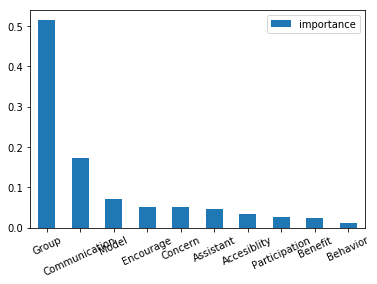

In [15]:
#random forest to get the import feature 
#https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
X=dataset.iloc[:,3:13]

## Import the random forest model
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
rf.fit(x, y) 
feature_importances = pd.DataFrame(rf.feature_importances_,index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.plot(kind='bar',rot=25)

Use Random forest model to find out the importent feature of this ten aspects. The higher the value is, the more important the feature have. 

And we can see that the group variable is the most important feature for senior mentor evaluation. The reason behind is that the group was devided by age of mentees. Younger mentees were in group 1 and the older mentees were at group 4. 

Other than group factor, the communication skill(Mentor assisted their mentee effectively)  and model (Mentor modeled correct level of participation for this mentee) are also important. And this can related to the group factor. Beauce if the age do not match, then it will cause the communication and model problem. And this reason can also be check in the comments. 

Otherwise, we can find out that the Encourage(mentor appropriately encouraged their mentee) and Concern (mentor demonstrated reasonable concern for their mentee) are also important. Mentors who are thoughtful can really bring the healing for mentees. Most important, if they have similar experiencem then they can better encourge them. And this is the gap we want to fill in the furture. 

## NPL for Comments
refernece: 
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/ 

In [28]:
#text mining
#https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/ 
text=dataset.iloc[:,[3,14,15]]
text=text.dropna()
text=text.sort_values(by=['label'])
text=text.reset_index(drop=True)

In [29]:
#token
from textblob import TextBlob
from nltk.tokenize import TabTokenizer
test=[]
test=pd.DataFrame(test)
test['Comments']=[]
test['label']=[]
test['Group']=[]
tokenizer=TabTokenizer()
for i in range(25):
    a=TextBlob(text['Comments '][i], tokenizer=tokenizer)
    for sentence in a.sentences:
        test=test.append({'Comments': str(sentence),'label': text['label'][i],'Group': text['Group'][i]}, ignore_index=True)

In [30]:
#removing punctuation
test['Comments'] = test['Comments'].str.replace('[^\w\s]','')
test['Comments'].head()
#removal of stop words 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('She')
stop.append('He')
stop.append('le')
stop.append('wa')
stop.append('David')
stop.append('Patrick')
stop.append('John')
test['comment'] =test['Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


#spelling
#from textblob import TextBlob
#test[0]=test[0].apply(lambda x: str(TextBlob(x).correct()))
#test[1]=test[1].apply(lambda x: str(TextBlob(x).correct()))
# Lemmatization
from textblob import Word
test['comment'] = test['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#lower letter for term of frequence
TAPS=['TAPS']
test['comment'] = test['comment'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in TAPS))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\intern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Term of frequence

In [31]:
#term of frequence 
tf1 = (test['comment']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1=tf1.sort_values(by='tf',ascending=False)
tf1=tf1.reset_index(drop=True)
tf1.head(10)

,words,tf
0,experience,14.0
1,need,14.0
2,mentee,9.0
3,mentor,9.0
4,supportive,5.0
5,event,5.0
6,great,5.0
7,group,4.0
8,benefit,4.0
9,mentees,4.0


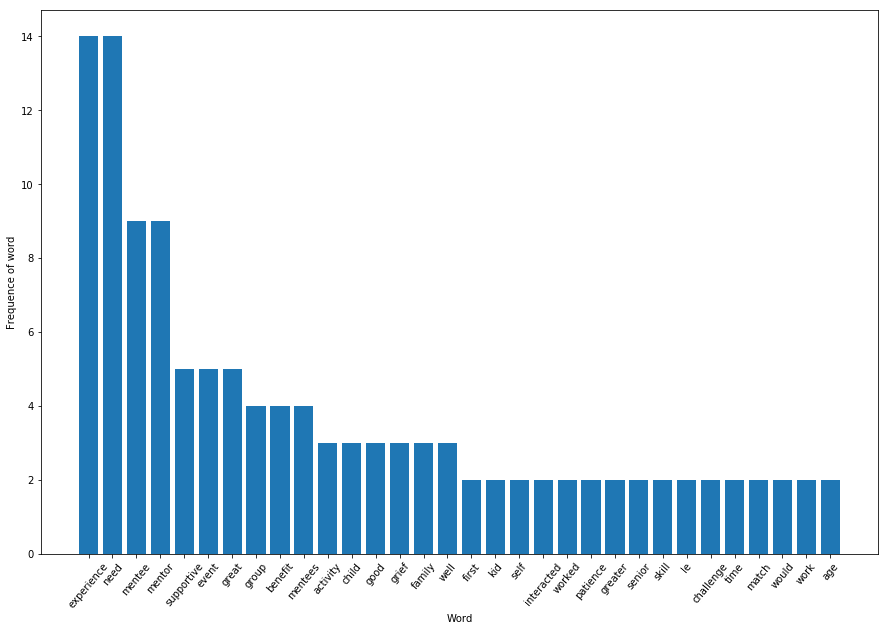

In [32]:
plt.figure(figsize=(15,10))
plt.bar(tf1['words'][0:32],tf1['tf'][0:32])
plt.xticks(rotation=50)
plt.xlabel("Word")
plt.ylabel("Frequence of word")
plt.show()

First thing we are trying to do is to find the term of frequence. The above figure show the frequence of comments. Most comment words are "need experience". Most of mentor are the first time mentor, they may be performed well but they need more experience to be the senior. Give more time for them to take part in different events that will be help. And We can see the words "supportive", "group", "patience","Activity"show. Mentor will supportive and patience who can follow the group and paticipate activity can be a good mentor for mentee. 

There are 1668 words in the combination of all review.


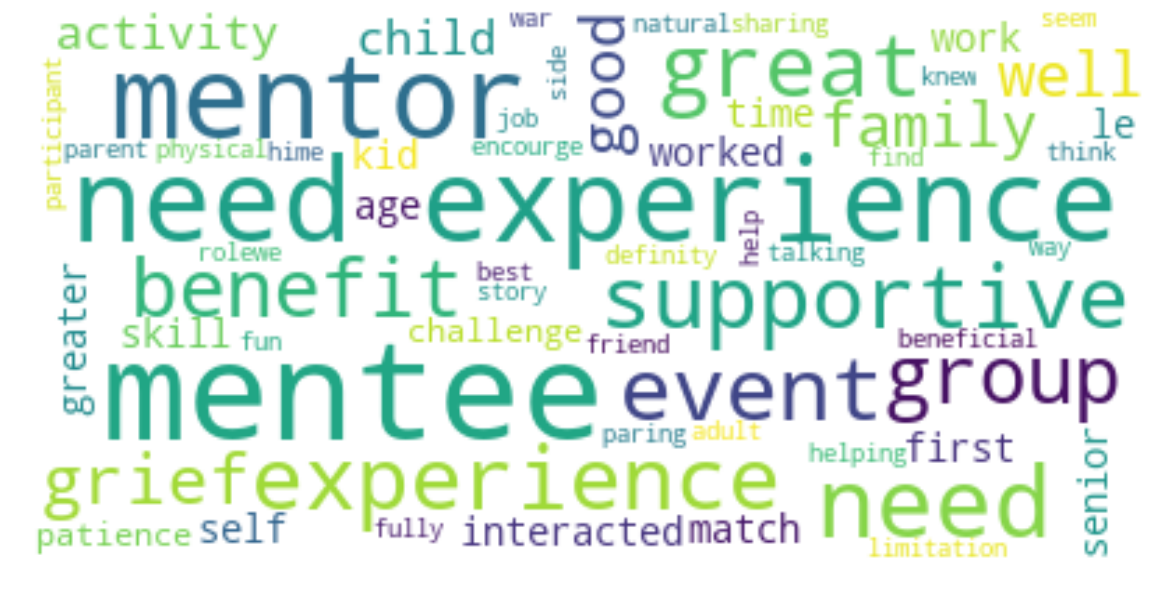

In [34]:
from wordcloud import WordCloud
word_text=" ".join(review for review in test.comment)
print('There are {} words in the combination of all review.'.format(len(word_text)))
wordcloud = WordCloud(max_font_size=50, max_words=60, background_color="white").generate(word_text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Sentiment Analyse for Comments

In [39]:
#sentiment analyse
#from textblob.sentiments import NaiveBayesAnalyzer
#from textblob.sentiments import PatternAnalyzer
#blob = TextBlob("I hate this library", analyzer=NaiveBayesAnalyzer())
#blob.sentiment
#test['sentiment']=test['Comments'].apply(lambda x: TextBlob(x).sentiment[0])
#print(test['sentiment'])

In [37]:
#label
#test.groupby(['label']).mean()['sentiment']
#group
test.groupby(['Group']).mean()['sentiment']

Group
1.0    0.251567
2.0    0.283889
3.0    0.305000
4.0    0.566667
Name: sentiment, dtype: float64

Sentiment analyse also prove the result that group is a very important feature. 

## Conclusion 

1. Most of mentor are the first time mentor that they need more experience. But some of them perform very well. They are more careful and follow the rule, engage to the activity. 
2. A good mentor should be truely concerned about mentee and encourage them. 
3. Before mentor take part in the event, they can have some mentor training. Not only the basic mentor, event stuff but also need to train them how to communicate, deal with and encourage children. Because sometime age match is matter and this question is uneasy to solve but at least we can teach them how to communicate with kids. 
4. Basic for the mentor, we need to worried about the experience of mentor, age match, children experience, engagement. 
5. For the future analysis improvment: we can create a system that combine the children information, mentor information and senior mentor evaluation so that we can find out the inner reason of a mentor that affact he/she behaivor in a mentor mentee program. 